In [258]:
from scipy import stats
from sklearn import preprocessing
from functools import reduce
import matplotlib as mpl
import numpy as np
import plotly.express as px
import pandas as pd
import seaborn as sns
from datetime import datetime
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline

In [259]:
movie_by_region 

Unnamed: 0  Unnamed: 0.1  id  release_date  \
0               0             0   1  Dec 18, 2009   
1               1             1   2  May 20, 2011   
2               2             2   3   Jun 7, 2019   
3               3             3   4   May 1, 2015   
4               4             4   5  Dec 15, 2017   
...           ...           ...  ..           ...   
11559        5761          5761  62  Dec 31, 2014   
11560        5764          5764  65  Dec 31, 2007   
11561        5771          5771  72  May 19, 2015   
11562        5777          5777  78  Dec 31, 2018   
11563        5780          5780  81  Sep 29, 2015   

                                             movie  production_budget  \
0                                           Avatar          425000000   
1      Pirates of the Caribbean: On Stranger Tides          410600000   
2                                     Dark Phoenix          350000000   
3                          Avengers: Age of Ultron          330600000   
4                Star Wars Ep. VIII: The Last Jedi          317000000   
...                                            ...                ...   
11559                         Stories of Our Lives              15000   
11560                                  Tin Can Man              12000   
11561                             Family Motocross              10000   
11562                                       Red 11               7000   
11563                         A Plague So Pleasant               1400   

       domestic_gross  worldwide_gross  foreign_gross  domestic_profit  \
0           760507625       2776345279     2015837654        335507625   
1           241063875       1045663875      804600000       -169536125   
2            42762350        149762350      107000000       -307237650   
3           459005868       1403013963      944008095        128405868   
4           620181382       1316721747      696540365        303181382   
...               ...              ...            ...              ...   
11559               0                0              0           -15000   
11560               0                0              0           -12000   
11561               0                0              0           -10000   
11562               0                0              0            -7000   
11563               0                0              0            -1400   

       foreign_profit  worldwide_profit  domestic_margin  foreign_margin  \
0          1590837654        2351345279            0.097           0.459   
1           394000000         635063875           -0.049           0.114   
2          -243000000        -200237650           -0.089          -0.070   
3           613408095        1072413963            0.037           0.177   
4           379540365         999721747            0.088           0.110   
...               ...               ...              ...             ...   
11559          -15000            -15000           -0.000          -0.000   
11560          -12000            -12000           -0.000          -0.000   
11561          -10000            -10000           -0.000          -0.000   
11562           -7000             -7000           -0.000          -0.000   
11563           -1400             -1400           -0.000          -0.000   

       WorldWide_margin    Region   year  normalized_worldwide_profit  
0                 0.679  Domestic   2009                    15.685962  
1                 0.183  Domestic   2011                     3.937254  
2                -0.058  Domestic   2019                    -1.780756  
3                 0.310  Domestic   2015                     6.931110  
4                 0.289  Domestic   2017                     6.433499  
...                 ...       ...    ...                          ...  
11559            -0.000   Foreign   2014                    -0.410143  
11560            -0.000   Foreign   2007                    -0.410122  
11561            -0.000   Foreign   2015   

In [260]:
movie_by_region["year"] = movie_by_region["release_date"].apply(lambda word: word.split(",")[1])


In [261]:
movie_avg = pd.DataFrame(movie_by_region.groupby(['year','Region'])["WorldWide_margin"].mean())


In [262]:
movie_avg

WorldWide_margin
year  Region                    
 1915 Domestic          0.003000
 1916 Domestic          0.002000
      Foreign           0.000000
 1920 Domestic          0.001000
 1925 Domestic          0.003500
...                          ...
 2018 Domestic          0.040781
      Foreign          -0.006500
 2019 Domestic          0.025864
      Foreign          -0.010000
 2020 Foreign          -0.027000

[136 rows x 1 columns]

In [263]:
fig = px.scatter(movie_avg, x="year", y= "WorldWide_margin",trendline="ols")
fig.show()

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['WorldWide_margin'] but received: year

In [264]:
#CORELATION GRAPH

In [265]:
fig = px.scatter(movie_by_region, x="production_budget", y= "WorldWide_margin" , color = 'Region',trendline="ols")
fig.show()

In [266]:
fig = px.scatter(movie_by_region, x="production_budget", y= "domestic_margin" , color = 'Region',trendline="ols")
fig.show()

In [267]:
fig = px.line(movie_by_region, x="year", y="WorldWide_margin",color = 'Region', title='Margin over Time')
fig.show()

In [268]:
movie_by_region

Unnamed: 0  Unnamed: 0.1  id  release_date  \
0               0             0   1  Dec 18, 2009   
1               1             1   2  May 20, 2011   
2               2             2   3   Jun 7, 2019   
3               3             3   4   May 1, 2015   
4               4             4   5  Dec 15, 2017   
...           ...           ...  ..           ...   
11559        5761          5761  62  Dec 31, 2014   
11560        5764          5764  65  Dec 31, 2007   
11561        5771          5771  72  May 19, 2015   
11562        5777          5777  78  Dec 31, 2018   
11563        5780          5780  81  Sep 29, 2015   

                                             movie  production_budget  \
0                                           Avatar          425000000   
1      Pirates of the Caribbean: On Stranger Tides          410600000   
2                                     Dark Phoenix          350000000   
3                          Avengers: Age of Ultron          330600000   
4                Star Wars Ep. VIII: The Last Jedi          317000000   
...                                            ...                ...   
11559                         Stories of Our Lives              15000   
11560                                  Tin Can Man              12000   
11561                             Family Motocross              10000   
11562                                       Red 11               7000   
11563                         A Plague So Pleasant               1400   

       domestic_gross  worldwide_gross  foreign_gross  domestic_profit  \
0           760507625       2776345279     2015837654        335507625   
1           241063875       1045663875      804600000       -169536125   
2            42762350        149762350      107000000       -307237650   
3           459005868       1403013963      944008095        128405868   
4           620181382       1316721747      696540365        303181382   
...               ...              ...            ...              ...   
11559               0                0              0           -15000   
11560               0                0              0           -12000   
11561               0                0              0           -10000   
11562               0                0              0            -7000   
11563               0                0              0            -1400   

       foreign_profit  worldwide_profit  domestic_margin  foreign_margin  \
0          1590837654        2351345279            0.097           0.459   
1           394000000         635063875           -0.049           0.114   
2          -243000000        -200237650           -0.089          -0.070   
3           613408095        1072413963            0.037           0.177   
4           379540365         999721747            0.088           0.110   
...               ...               ...              ...             ...   
11559          -15000            -15000           -0.000          -0.000   
11560          -12000            -12000           -0.000          -0.000   
11561          -10000            -10000           -0.000          -0.000   
11562           -7000             -7000           -0.000          -0.000   
11563           -1400             -1400           -0.000          -0.000   

       WorldWide_margin    Region   year  normalized_worldwide_profit  
0                 0.679  Domestic   2009                    15.685962  
1                 0.183  Domestic   2011                     3.937254  
2                -0.058  Domestic   2019                    -1.780756  
3                 0.310  Domestic   2015                     6.931110  
4                 0.289  Domestic   2017                     6.433499  
...                 ...       ...    ...                          ...  
11559            -0.000   Foreign   2014                    -0.410143  
11560            -0.000   Foreign   2007                    -0.410122  
11561            -0.000   Foreign   2015   

In [269]:
movie_by_region["normalized_worldwide_profit"] = (movie_by_region['worldwide_profit'] - movie_by_region['worldwide_profit'].mean())/movie_by_region['worldwide_profit'].std()  


In [270]:
movie_by_region

Unnamed: 0  Unnamed: 0.1  id  release_date  \
0               0             0   1  Dec 18, 2009   
1               1             1   2  May 20, 2011   
2               2             2   3   Jun 7, 2019   
3               3             3   4   May 1, 2015   
4               4             4   5  Dec 15, 2017   
...           ...           ...  ..           ...   
11559        5761          5761  62  Dec 31, 2014   
11560        5764          5764  65  Dec 31, 2007   
11561        5771          5771  72  May 19, 2015   
11562        5777          5777  78  Dec 31, 2018   
11563        5780          5780  81  Sep 29, 2015   

                                             movie  production_budget  \
0                                           Avatar          425000000   
1      Pirates of the Caribbean: On Stranger Tides          410600000   
2                                     Dark Phoenix          350000000   
3                          Avengers: Age of Ultron          330600000   
4                Star Wars Ep. VIII: The Last Jedi          317000000   
...                                            ...                ...   
11559                         Stories of Our Lives              15000   
11560                                  Tin Can Man              12000   
11561                             Family Motocross              10000   
11562                                       Red 11               7000   
11563                         A Plague So Pleasant               1400   

       domestic_gross  worldwide_gross  foreign_gross  domestic_profit  \
0           760507625       2776345279     2015837654        335507625   
1           241063875       1045663875      804600000       -169536125   
2            42762350        149762350      107000000       -307237650   
3           459005868       1403013963      944008095        128405868   
4           620181382       1316721747      696540365        303181382   
...               ...              ...            ...              ...   
11559               0                0              0           -15000   
11560               0                0              0           -12000   
11561               0                0              0           -10000   
11562               0                0              0            -7000   
11563               0                0              0            -1400   

       foreign_profit  worldwide_profit  domestic_margin  foreign_margin  \
0          1590837654        2351345279            0.097           0.459   
1           394000000         635063875           -0.049           0.114   
2          -243000000        -200237650           -0.089          -0.070   
3           613408095        1072413963            0.037           0.177   
4           379540365         999721747            0.088           0.110   
...               ...               ...              ...             ...   
11559          -15000            -15000           -0.000          -0.000   
11560          -12000            -12000           -0.000          -0.000   
11561          -10000            -10000           -0.000          -0.000   
11562           -7000             -7000           -0.000          -0.000   
11563           -1400             -1400           -0.000          -0.000   

       WorldWide_margin    Region   year  normalized_worldwide_profit  
0                 0.679  Domestic   2009                    15.685962  
1                 0.183  Domestic   2011                     3.937254  
2                -0.058  Domestic   2019                    -1.780756  
3                 0.310  Domestic   2015                     6.931110  
4                 0.289  Domestic   2017                     6.433499  
...                 ...       ...    ...                          ...  
11559            -0.000   Foreign   2014                    -0.410143  
11560            -0.000   Foreign   2007                    -0.410122  
11561            -0.000   Foreign   2015   

C:\Users\emadams\Anaconda3\envs\learn-env\lib\site-packages\pandas\core\series.py:726: RuntimeWarning:

invalid value encountered in log10



(0.0, 5.0)

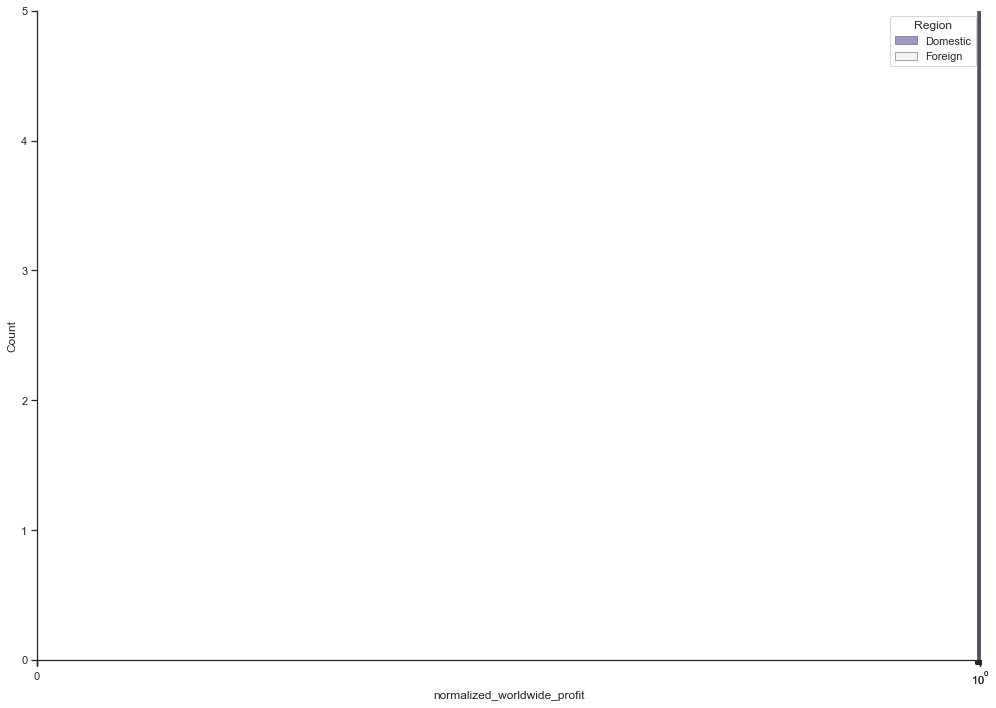

In [271]:
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(14,10 ))
sns.despine(f)

sns.histplot(
    movie_by_region,
    x="normalized_worldwide_profit", hue="Region",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)
ax.set_xticks([-3, -2, 1 , 0 , 1 , 2 ,3])
plt.ylim(0, 5)


AttributeError: 'list' object has no attribute 'set_xticks'

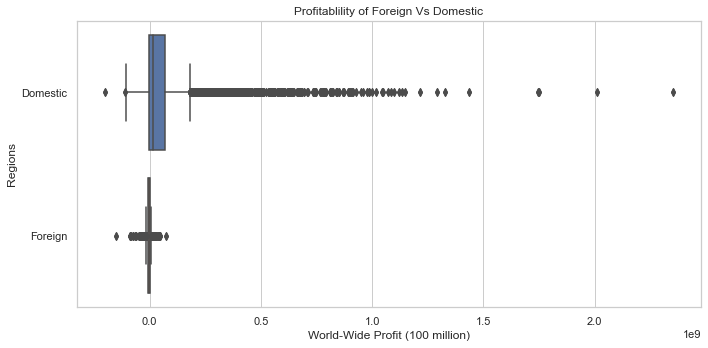

In [278]:
plt.rcParams["figure.figsize"] = [10, 5]
plt.rcParams["figure.autolayout"] = True
sns.set_style("whitegrid")
tips = movie_by_region
ax = sns.boxplot(y="Region", x="worldwide_profit" , data=tips).set(
    xlabel='World-Wide Profit (100 million)',
    ylabel = 'Regions',
    title = "Profitablility of Foreign Vs Domestic")
   
ax.set_xticks([ -1000000000 , 0 , 1000000000 , 2000000000 ])
plt.show()

In [273]:
fig = px.box(movie_by_region, x="worldwide_profit", y="Region")
fig.show()